## SBA - 504 & 7a - Initial exploration

### 504 loans (through Certified Development Company) 

In [1]:
import pandas as pd

In [2]:
# First pass only. then use csv 

import xlrd
xls_504 = pd.read_excel('SBAcopy.xlsx')                 
xls_504.to_csv('SBA_504.csv',index=False)

In [3]:
SBA_504 = pd.read_csv('SBA_504.csv', low_memory=False)    # DtypeWarning: Columns (12,13,14,20) have mixed types. 
                                                          # Specify dtype option on import or set low_memory=False

In [4]:
SBA_504.columns

Index(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'CDC_Zip',
       'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ThirdPartyDollars', 'GrossApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate',
       'DeliveryMethod', 'subpgmdesc', 'InitialInterestRate', 'TermInMonths',
       'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'LoanStatus', 'ChargeOffDate',
       'GrossChargeOffAmount', 'JobsSupported'],
      dtype='object')

In [5]:
# xls_504.describe()

In [6]:
# Counts of programs grouped by location of projects

SBA_504.groupby(by='ProjectState').Program.count().sort_values(ascending = False).head(10)

ProjectState
CA    32255
FL    10618
TX     7790
IL     6658
MN     6565
NY     6412
OH     5866
UT     5508
CO     5082
GA     4419
Name: Program, dtype: int64

In [8]:
# Counts of programs grouped by state where loan was borrowed from

SBA_504.groupby(by='BorrState').Program.count().sort_values(ascending = False).head(10)

BorrState
CA    32304
FL    10611
TX     7793
IL     6660
MN     6564
NY     6425
OH     5866
UT     5521
CO     5085
GA     4422
Name: Program, dtype: int64

In [9]:
# Number of projects based in CA doesn't match the number of projects borrowing from CA
# Below is the number of projects based in CA that also borrow from CA

SBA_504[(SBA_504.BorrState=='CA') & (SBA_504.ProjectState=='CA')].ProjectState.count()   

32248

In [10]:
# Number of programs where project was based in CA but lendor was not

SBA_504[(SBA_504.BorrState != 'CA') & (SBA_504.ProjectState == 'CA')].BorrState.count()

7

In [11]:
# When CA-based projects borrowed from outside of CA, where did they borrow from?

SBA_504[(SBA_504.BorrState != 'CA') & (SBA_504.ProjectState == 'CA')].groupby(by='BorrState').BorrState.count().sort_values(ascending=False)

BorrState
NV    2
VA    1
LA    1
KS    1
CT    1
AZ    1
Name: BorrState, dtype: int64

In [12]:
# Number of programs where lendor was based in CA but project was not

SBA_504[(SBA_504.BorrState == 'CA') & (SBA_504.ProjectState != 'CA')].ProjectState.count()

56

In [13]:
# When CA-based lendors lend to projects outside of CA, where are those projects based?

SBA_504[(SBA_504.BorrState == 'CA') & (SBA_504.ProjectState != 'CA')].groupby(by='ProjectState').ProjectState.count().sort_values(ascending=False)

ProjectState
AR    20
NV     9
AL     8
OR     6
FL     4
WA     2
IA     2
AZ     2
MI     1
LA     1
IL     1
Name: ProjectState, dtype: int64

In [14]:
# Arkansas?! Below are SBA district offices for Arkansas based projects linked with funding in CA

SBA_504[(SBA_504.BorrState == 'CA') & (SBA_504.ProjectState == 'AR')].groupby(by='SBADistrictOffice').ProjectState.count().sort_values(ascending=False)

SBADistrictOffice
SAN DIEGO DISTRICT OFFICE         11
SAN FRANCISCO DISTRICT OFFICE      5
SANTA ANA DISTRICT OFFICE          4
Name: ProjectState, dtype: int64

In [15]:
# SBA offices for top non contiguous project states borrowing from CA

SBA_504[(SBA_504.BorrState == 'CA') & (SBA_504.ProjectState.isin(['AR','AL','FL','IA']))].groupby(by='SBADistrictOffice').ProjectState.count().sort_values(ascending=False)

SBADistrictOffice
SAN FRANCISCO DISTRICT OFFICE     17
SAN DIEGO DISTRICT OFFICE         11
SANTA ANA DISTRICT OFFICE          4
DES MOINES DISTRICT OFFICE         1
CEDAR RAPIDS BRANCH OFFICE         1
Name: ProjectState, dtype: int64

In [24]:
# top SBA offices for programs where the borrowing state was Caifornia

SBA_504[SBA_504.BorrState=='CA'].groupby(by='SBADistrictOffice').Program.count().sort_values(ascending=False).head(15)

SBADistrictOffice
SANTA ANA DISTRICT OFFICE         7468
LOS ANGELES DISTRICT OFFICE       7447
SAN FRANCISCO DISTRICT OFFICE     7104
SACRAMENTO DISTRICT OFFICE        4069
SAN DIEGO DISTRICT OFFICE         3327
FRESNO DISTRICT OFFICE            2866
PORTLAND DISTRICT OFFICE             8
NEVADA DISTRICT OFFICE               8
ARIZONA DISTRICT OFFICE              2
SPRINGFIELD BRANCH OFFICE            1
MICHIGAN DISTRICT OFFICE             1
LOUISIANA DISTRICT OFFICE            1
DES MOINES DISTRICT OFFICE           1
CEDAR RAPIDS BRANCH OFFICE           1
Name: Program, dtype: int64

In [27]:
# Pivot - Program count for CA based & borrowing projects by SBA office & CDC state

SBA_504[(SBA_504.BorrState=='CA') & (SBA_504.ProjectState=='CA')].pivot_table('Program',index='CDC_State',
    columns='SBADistrictOffice',aggfunc='count') #.sort_values(by='Project',ascending=False).head(10)


SBADistrictOffice,FRESNO DISTRICT OFFICE,LOS ANGELES DISTRICT OFFICE,SACRAMENTO DISTRICT OFFICE,SAN DIEGO DISTRICT OFFICE,SAN FRANCISCO DISTRICT OFFICE,SANTA ANA DISTRICT OFFICE
CDC_State,,,,,,
CA,2736.0,6683.0,2155.0,3036.0,6816.0,6814.0
CO,127.0,761.0,1906.0,263.0,242.0,644.0
DC,NaN,NaN,NaN,NaN,26.0,NaN
FL,NaN,1.0,NaN,NaN,NaN,NaN
ND,NaN,NaN,NaN,NaN,NaN,1.0
NV,NaN,NaN,7.0,NaN,NaN,NaN
OH,NaN,NaN,1.0,1.0,NaN,NaN
OR,NaN,NaN,NaN,1.0,NaN,NaN
SD,NaN,NaN,NaN,1.0,NaN,NaN


In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

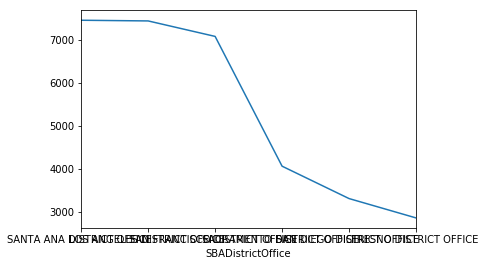

In [33]:
SBAbreakdown = SBA_504[(SBA_504.BorrState=='CA') & (SBA_504.ProjectState=='CA')].groupby('SBADistrictOffice').Program.count().sort_values(ascending=False)

SBAbreakdown.plot()

In [35]:
import seaborn as sns

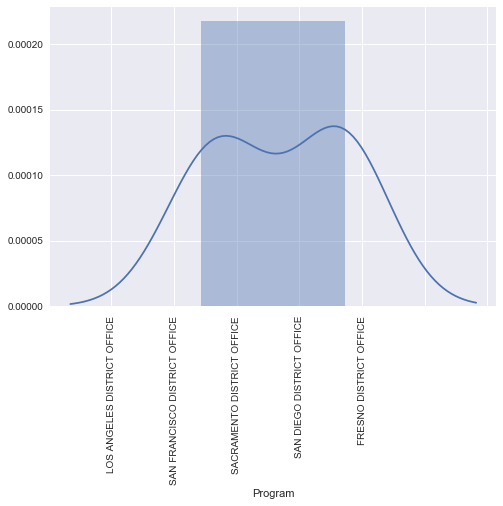

In [42]:
# wtf
grph = sns.distplot(SBAbreakdown )  #, kde=False, rug=True) 

grph.set_xticklabels(labels = SBAbreakdown.index, rotation=90)

In [40]:
SBAbreakdown

SBADistrictOffice
SANTA ANA DISTRICT OFFICE         7463
LOS ANGELES DISTRICT OFFICE       7447
SAN FRANCISCO DISTRICT OFFICE     7087
SACRAMENTO DISTRICT OFFICE        4069
SAN DIEGO DISTRICT OFFICE         3316
FRESNO DISTRICT OFFICE            2866
Name: Program, dtype: int64

In [101]:
# Appears to be less of a trend that CDC is in the same state as the project

SBA_504[(SBA_504.ProjectState=='CA') & (SBA_504.CDC_State!='CA')].Program.count()

4010

In [103]:
# SBA offices where project is in CA but CDC is not 

SBA_504[(SBA_504.ProjectState=='CA') & (SBA_504.CDC_State!='CA')].groupby(by='SBADistrictOffice').Program.count().sort_values(ascending=False)

SBADistrictOffice
SACRAMENTO DISTRICT OFFICE        1915
LOS ANGELES DISTRICT OFFICE        764
SANTA ANA DISTRICT OFFICE          649
SAN DIEGO DISTRICT OFFICE          280
SAN FRANCISCO DISTRICT OFFICE      271
FRESNO DISTRICT OFFICE             130
CONNECTICUT DISTRICT OFFICE          1
Name: Program, dtype: int64

In [91]:
# Top lenders for all projects

SBA_504.groupby(by='ThirdPartyLender_Name').Program.count().sort_values(ascending = False).head(10)

ThirdPartyLender_Name
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION    2731
BANK OF AMERICA, NATIONAL ASSOCIATION        2131
ZIONS BANK, A DIVISION OF                    1910
WELLS FARGO BANK, NATIONAL ASSOCIATION       1759
BANK OF THE WEST                             1015
REGIONS BANK                                  647
THE HUNTINGTON NATIONAL BANK                  539
BRANCH BANKING AND TRUST COMPANY              536
SUNTRUST BANK                                 535
PNC BANK, NATIONAL ASSOCIATION                534
Name: Program, dtype: int64

In [92]:
# Top lenders for CA projects

SBA_504[SBA_504.ProjectState=='CA'].groupby(by='ThirdPartyLender_Name').Program.count().sort_values(ascending = False).head(10)

ThirdPartyLender_Name
BANK OF AMERICA, NATIONAL ASSOCIATION        1034
WELLS FARGO BANK, NATIONAL ASSOCIATION        924
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION     909
ZIONS BANK, A DIVISION OF                     805
BANK OF THE WEST                              764
MUFG UNION BANK, NATIONAL ASSOCIATION         422
CITY NATIONAL BANK                            291
CIT BANK, NATIONAL ASSOCIATION                247
PLAZA BANK                                    239
WESTERN ALLIANCE BANK                         224
Name: Program, dtype: int64

In [12]:
# Top CDCs for all projects

SBA_504.groupby(by='CDC_Name').Program.count().sort_values(ascending = False).head(10)

CDC_Name
CDC Small Business Finance Corporation                    9461
Florida Business Development Corporation                  6179
Empire State Certified Development Corporation            6015
Mortgage Capital Development Corporation                  4530
Mountain West Small Business Finance                      4529
Granite State Economic Development Corporation            4182
SBA - EDF Enforcement Action                              3753
Florida First Capital Finance Corporation, Inc.           3527
Small Business Growth Corporation                         3425
Wisconsin Business Development Finance Corporation        3296
Colorado Lending Source, Ltd.                             2886
Business Finance Group, Inc.                              2859
Evergreen Business Capital                                2852
California Statewide Certified Development Corporation    2477
SomerCor 504, Inc.                                        2441
Twin Cities-Metro Certified Development Compan

In [98]:
# Top CDCs for CA-based projects

SBA_504[SBA_504.ProjectState=='CA'].groupby(by='CDC_Name').Program.count().sort_values(ascending = False).head(10)

CDC_Name
CDC Small Business Finance Corporation                    8934
Mortgage Capital Development Corporation                  4288
SBA - EDF Enforcement Action                              3682
California Statewide Certified Development Corporation    2470
Bay Area Employment Development Company                   2263
Southland Economic  Development Corporation               1934
Capital Access Group, Inc.                                1556
Greater Sacramento Certified Development Corporation      1119
Business Finance Capital                                   799
Mid State Development Corporation                          711
Name: Program, dtype: int64

### 7(a) loans

In [ ]:
# first pass only. then use csv 

# xls_7a = pd.read_excel('FOIA - 7(a) (FY2010-Present).xlsx')    
# xls_7a.to_csv('SBA_7a.csv')                                    

In [34]:
SBA_7a = pd.read_csv('SBA_7a.csv', low_memory=False)     # DtypeWarning: Columns (11,31) have mixed types 

In [35]:
SBA_7a.columns

Index(['Unnamed: 0', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'BankName', 'BankStreet', 'BankCity',
       'BankState', 'BankZip', 'GrossApproval', 'SBAGuaranteedApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate',
       'DeliveryMethod', 'subpgmdesc', 'InitialInterestRate', 'TermInMonths',
       'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'LoanStatus', 'ChargeOffDate',
       'GrossChargeOffAmount', 'RevolverStatus', 'JobsSupported'],
      dtype='object')

### City profiles 

In [32]:
# first pass only. then load data from csv 

# xls_ci = pd.read_excel('0912 - City Profiles.xlsx')    
# xls_ci.to_csv('SBA_city.csv')                          

In [78]:
SBA_ci = pd.read_csv('SBA_city.csv')

In [79]:
SBA_ci.columns

Index(['Unnamed: 0', 'Name', 'Sq Mi', 'Zip Codes', 'GeoID', 'County', 'Pop',
       'Pop Density', '# of businesses (referenceUSA)',
       '# of businesses (mergent)',
       '# of businesses (census community survey)', '# of businesses Average',
       '# of businesses per sq. mile (referenceUSA)',
       '# of businesses per sq. mile (mergent)',
       '# of businesses per sq. mile (Census)',
       '# of businesses per sq. mile (average)', 'City-Lat', 'City-Lon'],
      dtype='object')

In [80]:
len(SBA_ci.Name)

117

In [ ]:
SBA_504[(SBA_504.ProjectState=='CA') & (SBA_504.CDC_State!='CA')]